In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start= '2007-1-1', end='2017-3-21')['Adj Close']

In [3]:
log_returns = np.log(1 + data.pct_change())

### Euler Discretization



In [4]:
#Assign risk-free rate to variable r
r = 0.025

In [5]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.176551
dtype: float64

In [6]:
type(stdev) #To verify it is a series

pandas.core.series.Series

In [7]:
stdev = stdev.values
stdev

array([0.17655059])

In [15]:
#Forecasting one year ahead
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [16]:
Z = np.random.standard_normal((t_intervals + 1, iterations)) #assign what Z is
S = np.zeros_like(Z) #Create an empty array for S
S0 = data.iloc[-1] #To fill 1st row with last available stock price
S[0] = S0

In [17]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [28]:
S

array([[85.4156189 , 85.4156189 , 85.4156189 , ..., 85.4156189 ,
        85.4156189 , 85.4156189 ],
       [85.98201347, 87.51227273, 86.30840424, ..., 86.41556795,
        84.29866184, 86.42598904],
       [85.99446969, 86.69442718, 86.67669499, ..., 86.03361624,
        85.63620461, 87.12164835],
       ...,
       [90.41942458, 77.71719448, 95.07059985, ..., 65.99197125,
        88.12076154, 80.02884128],
       [90.15051022, 78.81886811, 95.21176978, ..., 67.07772501,
        86.70757905, 80.33010003],
       [90.89456847, 78.36665032, 95.29394434, ..., 67.94751435,
        88.07067714, 81.01511139]])

In [19]:
S.shape

(251L, 10000L)

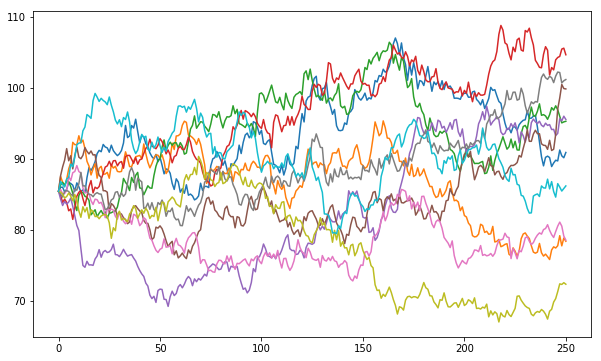

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]) #:10 limits the graphs to the first 10 simulations

In [24]:
p = np.maximum(S[-1] - 110, 0) #np.maximum will create an array that contains either 0s or the numbers equal to the difference
p

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
p.shape

(10000L,)

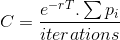

In [27]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.831515569105987